<a href="https://colab.research.google.com/github/CodyBurker/W266_Group_Project/blob/master/ModelConfidenceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/CodyBurker/W266_Group_Project

Cloning into 'W266_Group_Project'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 255 (delta 117), reused 91 (delta 23), pack-reused 0
Receiving objects: 100% (255/255), 142.11 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (117/117), done.
Checking out files: 100% (52/52), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def read_in_data(path="W266_Group_Project/"):
    import pandas as pd
    CNN_Predictions = pd.read_csv(path + "CNN_Confidence_x_train_stage_2_sampled_yelp_data.csv")
    t5_Predictions = pd.read_csv(path + "t5_Predictions.csv")
    BERT_Predictions = pd.read_csv(path + "BERT_Confidence_Predictions_80k_Stage_2.csv")
    CNN_Predictions_X_test = pd.read_csv(path + "CNN_Confidence_x_test_sampled_yelp_data_NEW.csv")
    t5_Predictions_X_test = pd.read_csv(path + "t5_Predictions_test20k.csv")
    BERT_Predictions_X_test = pd.read_csv(path + "BERT_X_Test_Confidence_Predictions.csv")
    y_test = pd.read_csv(path + "y_test_sampled_yelp_data_NEW.csv")
    return CNN_Predictions, t5_Predictions, BERT_Predictions, y_test, CNN_Predictions_X_test, t5_Predictions_X_test, BERT_Predictions_X_test
CNN_Predictions, t5_Predictions, BERT_Predictions, y_test, CNN_Predictions_X_test, t5_Predictions_X_test, BERT_Predictions_X_test = read_in_data()

In [4]:
CNN_Predictions

,Unnamed: 0,CNN1,CNN2,CNN3,CNN4,CNN5
0,0,5.427476e-11,2.715670e-10,6.243860e-07,0.011438,0.988562
1,1,8.084996e-04,1.569545e-03,2.182554e-02,0.271557,0.704240
2,2,1.538801e-04,8.844910e-04,2.496092e-02,0.389661,0.584339
3,3,2.277644e-03,7.508255e-03,8.434497e-02,0.502889,0.402980
4,4,2.641205e-04,2.914766e-03,7.740989e-02,0.604250,0.315161
...,...,...,...,...,...,...
79995,79995,7.084869e-04,3.085575e-03,5.436052e-02,0.466108,0.475737
79996,79996,9.292719e-08,7.591374e-07,2.654752e-04,0.121828,0.877906
79997,79997,3.046503e-04,3.520773e-04,4.828411e-03,0.132024,0.862491
79998,79998,6.403273e-05,1.884199e-03,8.940139e-02,0.711236,0.197414


In [5]:
CNN_Predictions_X_test
# I believe this is Cody's mislabeled CNN probabilities

,Unnamed: 0,CNN1,CNN2,CNN3,CNN4,CNN5
0,0,3.192664e-07,8.497344e-07,0.000128,0.056308,0.943563
1,1,3.967343e-07,6.186231e-06,0.001827,0.273400,0.724766
2,2,1.501992e-07,1.440981e-06,0.000466,0.157051,0.842481
3,3,5.104080e-07,1.112177e-06,0.000151,0.056605,0.943243
4,4,1.618752e-04,3.904097e-04,0.008331,0.196789,0.794327
...,...,...,...,...,...,...
19995,19995,2.566058e-04,1.955470e-03,0.052774,0.521049,0.423965
19996,19996,6.207200e-01,1.164334e-01,0.054312,0.038678,0.169856
19997,19997,3.409913e-01,2.749851e-01,0.238320,0.090529,0.055175
19998,19998,2.946011e-04,2.487160e-04,0.003161,0.099363,0.896932


In [6]:
t5_Predictions

,Predicted,Actual
0,5.0,5.0
1,4.0,5.0
2,5.0,5.0
3,4.0,4.0
4,5.0,5.0
...,...,...
79995,5.0,4.0
79996,4.0,5.0
79997,5.0,5.0
79998,4.0,5.0


In [7]:
t5_Predictions_X_test['Predicted']

0        5.0
1        5.0
2        5.0
3        5.0
4        2.0
        ... 
19995    4.0
19996    1.0
19997    1.0
19998    5.0
19999    5.0
Name: Predicted, Length: 20000, dtype: float64

In [8]:
BERT_Predictions

,Unnamed: 0,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5
0,0,0.024857,0.005415,0.056003,0.771531,0.996599
1,1,0.004481,0.010059,0.391948,0.945052,0.939804
2,2,0.004939,0.007811,0.328711,0.951087,0.958482
3,3,0.080064,0.538852,0.838086,0.650266,0.089823
4,4,0.005559,0.008710,0.287581,0.939283,0.965524
...,...,...,...,...,...,...
79995,79995,0.007587,0.009282,0.259549,0.918401,0.974184
79996,79996,0.004677,0.007319,0.323360,0.945821,0.960495
79997,79997,0.009608,0.009092,0.165691,0.881253,0.983475
79998,79998,0.003487,0.012239,0.467620,0.951012,0.884621


In [9]:
BERT_Predictions_X_test


,Unnamed: 0,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5
0,0,0.019746,0.018920,0.477434,0.991300,0.994669
1,1,0.010047,0.038473,0.144444,0.952882,0.998253
2,2,0.008667,0.021188,0.240987,0.976283,0.998178
3,3,0.027592,0.057912,0.104421,0.880103,0.998919
4,4,0.051178,0.041205,0.379122,0.961949,0.993305
...,...,...,...,...,...,...
19995,19995,0.017410,0.019457,0.550589,0.991522,0.992207
19996,19996,0.734186,0.514997,0.543162,0.500637,0.338703
19997,19997,0.993853,0.917035,0.313864,0.055757,0.039432
19998,19998,0.020995,0.020365,0.315483,0.986063,0.996830


In [10]:
y_test['stars']

0        5.0
1        3.0
2        5.0
3        5.0
4        5.0
        ... 
19995    3.0
19996    1.0
19997    1.0
19998    4.0
19999    5.0
Name: stars, Length: 20000, dtype: float64

In [11]:
train_data = {'BERT_1': BERT_Predictions['BERT_1'],
              'BERT_2': BERT_Predictions['BERT_2'],
              'BERT_3': BERT_Predictions['BERT_3'],
              'BERT_4': BERT_Predictions['BERT_4'],
              'BERT_5': BERT_Predictions['BERT_5'],
              'CNN_1': CNN_Predictions['CNN1'],
              'CNN_2': CNN_Predictions['CNN2'],
              'CNN_3': CNN_Predictions['CNN3'],
              'CNN_4': CNN_Predictions['CNN4'],
              'CNN_5': CNN_Predictions['CNN5'],
              'T5_Preds': t5_Predictions['Predicted'],
              'Actuals': t5_Predictions['Actual']
              }

In [12]:
train_combined_dataframe = pd.DataFrame(train_data)
train_combined_dataframe = train_combined_dataframe.drop('Actuals', axis = 1)
train_combined_dataframe
# may need to clean up the formatting of the values to align( e.g., integer vs. float)

,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5,CNN_1,CNN_2,CNN_3,CNN_4,CNN_5,T5_Preds
0,0.024857,0.005415,0.056003,0.771531,0.996599,5.427476e-11,2.715670e-10,6.243860e-07,0.011438,0.988562,5.0
1,0.004481,0.010059,0.391948,0.945052,0.939804,8.084996e-04,1.569545e-03,2.182554e-02,0.271557,0.704240,4.0
2,0.004939,0.007811,0.328711,0.951087,0.958482,1.538801e-04,8.844910e-04,2.496092e-02,0.389661,0.584339,5.0
3,0.080064,0.538852,0.838086,0.650266,0.089823,2.277644e-03,7.508255e-03,8.434497e-02,0.502889,0.402980,4.0
4,0.005559,0.008710,0.287581,0.939283,0.965524,2.641205e-04,2.914766e-03,7.740989e-02,0.604250,0.315161,5.0
...,...,...,...,...,...,...,...,...,...,...,...
79995,0.007587,0.009282,0.259549,0.918401,0.974184,7.084869e-04,3.085575e-03,5.436052e-02,0.466108,0.475737,5.0
79996,0.004677,0.007319,0.323360,0.945821,0.960495,9.292719e-08,7.591374e-07,2.654752e-04,0.121828,0.877906,4.0
79997,0.009608,0.009092,0.165691,0.881253,0.983475,3.046503e-04,3.520773e-04,4.828411e-03,0.132024,0.862491,5.0
79998,0.003487,0.012239,0.467620,0.951012,0.884621,6.403273e-05,1.884199e-03,8.940139e-02,0.711236,0.197414,4.0


In [13]:
train_actuals = pd.DataFrame(train_data)
train_actuals = train_actuals[['Actuals']]
train_actuals

,Actuals
0,5.0
1,5.0
2,5.0
3,4.0
4,5.0
...,...
79995,4.0
79996,5.0
79997,5.0
79998,5.0


In [14]:
test_data = {'BERT_1': BERT_Predictions_X_test['BERT_1'],
             'BERT_2': BERT_Predictions_X_test['BERT_2'],
             'BERT_3': BERT_Predictions_X_test['BERT_3'],
             'BERT_4': BERT_Predictions_X_test['BERT_4'],
             'BERT_5': BERT_Predictions_X_test['BERT_5'],
             'CNN_1': CNN_Predictions_X_test['CNN1'],
             'CNN_2': CNN_Predictions_X_test['CNN2'],
             'CNN_3': CNN_Predictions_X_test['CNN3'],
             'CNN_4': CNN_Predictions_X_test['CNN4'],
             'CNN_5': CNN_Predictions_X_test['CNN5'],
             'T5_Preds': t5_Predictions_X_test['Predicted'],
             'Actuals': y_test['stars']
             }

In [15]:
test_combined_dataframe = pd.DataFrame(test_data)
test_combined_dataframe = test_combined_dataframe.drop('Actuals', axis = 1)
test_combined_dataframe

,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5,CNN_1,CNN_2,CNN_3,CNN_4,CNN_5,T5_Preds
0,0.019746,0.018920,0.477434,0.991300,0.994669,3.192664e-07,8.497344e-07,0.000128,0.056308,0.943563,5.0
1,0.010047,0.038473,0.144444,0.952882,0.998253,3.967343e-07,6.186231e-06,0.001827,0.273400,0.724766,5.0
2,0.008667,0.021188,0.240987,0.976283,0.998178,1.501992e-07,1.440981e-06,0.000466,0.157051,0.842481,5.0
3,0.027592,0.057912,0.104421,0.880103,0.998919,5.104080e-07,1.112177e-06,0.000151,0.056605,0.943243,5.0
4,0.051178,0.041205,0.379122,0.961949,0.993305,1.618752e-04,3.904097e-04,0.008331,0.196789,0.794327,2.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.017410,0.019457,0.550589,0.991522,0.992207,2.566058e-04,1.955470e-03,0.052774,0.521049,0.423965,4.0
19996,0.734186,0.514997,0.543162,0.500637,0.338703,6.207200e-01,1.164334e-01,0.054312,0.038678,0.169856,1.0
19997,0.993853,0.917035,0.313864,0.055757,0.039432,3.409913e-01,2.749851e-01,0.238320,0.090529,0.055175,1.0
19998,0.020995,0.020365,0.315483,0.986063,0.996830,2.946011e-04,2.487160e-04,0.003161,0.099363,0.896932,5.0


Check calibration

In [16]:
bert_confdience = np.array(train_combined_dataframe[['BERT_1','BERT_2','BERT_3','BERT_4','BERT_5']]).max(axis=1)
bert_pred = np.array(train_combined_dataframe[['BERT_1','BERT_2','BERT_3','BERT_4','BERT_5']]).argmax(axis=1) + 1
bert_correct = train_actuals
cnn_confdience = np.array(train_combined_dataframe[['CNN_1','CNN_2','CNN_3','CNN_4','CNN_5']]).max(axis=1)
cnn_pred = np.array(train_combined_dataframe[['CNN_1','CNN_2','CNN_3','CNN_4','CNN_5']]).argmax(axis=1) + 1
cnn_correct = cnn_pred == train_actuals['Actuals']
bert_correct = bert_pred == train_actuals['Actuals']

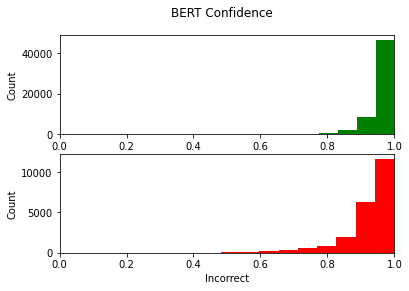

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = bert_confdience[bert_correct]
y = bert_confdience[~ bert_correct]

colors = ['g','r']

#plots the histogram
fig, (ax1,ax2) = plt.subplots(2)
plt.suptitle("BERT Confidence")
ax1.hist(x, color="g")
ax1.set_xlim(0,1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Correct")

ax2.hist(y, color="r")
ax2.set_xlim(0,1)
ax2.set_ylabel("Count")
ax2.set_xlabel("Incorrect")


# plt.tight_layout()
plt.show()

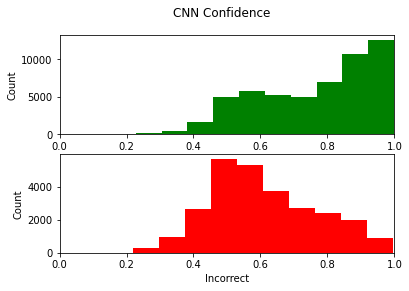

In [18]:
x = cnn_confdience[cnn_correct]
y = cnn_confdience[~ cnn_correct]

colors = ['g','r']

#plots the histogram
fig, (ax1,ax2) = plt.subplots(2)
plt.suptitle("CNN Confidence")
ax1.hist(x, color="g")
ax1.set_xlim(0,1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Correct")

ax2.hist(y, color="r")
ax2.set_xlim(0,1)
ax2.set_ylabel("Count")
ax2.set_xlabel("Incorrect")


# plt.tight_layout()
plt.show()

array([0.60425   , 0.6195816 , 0.6202073 , ..., 0.644232  , 0.47573733,
       0.7112364 ])

In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = bert_confdience[bert_correct]
y = bert_confdience[~ bert_correct]

bins = np.linspace(0,1,20)

binned_x = np.digitize(x,bins, right=True)
# bert_correct_bins = np.array([sum(binned_x==i) for i,_ in enumerate(bins)])
bert_correct_bins = np.bincount(binned_x)
binned_y = np.digitize(y,bins, right=True)
bert_incorret_bins = np.bincount(binned_y)
bert_total = bert_correct_bins + bert_incorret_bins
bert_correct_rates = bert_correct_bins / (bert_incorret_bins + bert_correct_bins)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = cnn_confdience[cnn_correct]
y = cnn_confdience[~ cnn_correct]

bins = np.linspace(0,1,20)

binned_x = np.digitize(x,bins, right=True)
cnncorrect_bins = np.bincount(binned_x)
binned_y = np.digitize(y,bins, right=True)
cnn_incorret_bins = np.bincount(binned_y)

cnn_correct_rates = cnncorrect_bins / (cnncorrect_bins + cnn_incorret_bins)
combined_accuracy = pd.DataFrame({"bins":bins,"bert":bert_correct_rates,"cnn":cnn_correct_rates})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [41]:
cnn_correct_rates

array([       nan,        nan,        nan,        nan,        nan,
       0.1779661 , 0.26252505, 0.29135539, 0.32552343, 0.39237365,
       0.47049012, 0.5140211 , 0.55810928, 0.58931581, 0.64040636,
       0.68733754, 0.7483201 , 0.82435105, 0.89451434, 0.95399429])

In [42]:
cnncorrect_bins + cnn_incorret_bins

array([   0,    0,    0,    0,    0,  118,  499,  937, 2006, 4432, 7794,
       7774, 6918, 5934, 5217, 5386, 6548, 8090, 9935, 8412])

In [43]:
len(x) 

53362

In [44]:
cnn_confdience[cnn_correct].shape

(53362,)

In [45]:
sum(cnn_correct)

53362

[]

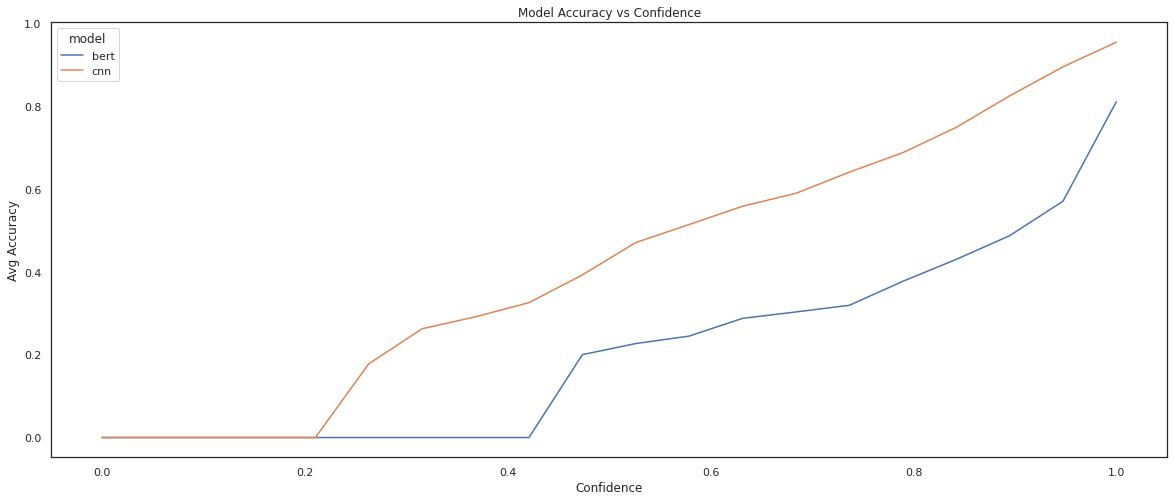

In [63]:
import seaborn as sn
bins_list = []
key = []
value = []
for i in range(len(combined_accuracy)):
  # flatlist.append(comb)
  bert = combined_accuracy.iloc[i]['bert']
  cnn = combined_accuracy.iloc[i]['cnn']
  bin = combined_accuracy.iloc[i]['bins']
  
  bins_list.append(bin)
  key.append('bert')
  value.append(bert)
  
  key.append('cnn')
  bins_list.append(bin)
  value.append(cnn)

narrow_df = pd.DataFrame({"bin":bins_list,"model":key,"value":value})
narrow_df['value'] = narrow_df['value'].fillna(0)
p = sns.lineplot(data = narrow_df,
            x = "bin",
            y = "value",
            hue="model")
p.set_xlabel("Confidence")
p.set_ylabel("Avg Accuracy")
p.set_title('Model Accuracy vs Confidence')
sns.set(rc = {'figure.figsize':(20,8)})
sns.set_style('white')
plt.plot()

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.177966
12    0.000000
13    0.262525
14    0.000000
15    0.291355
16    0.000000
17    0.325523
18    0.200000
19    0.392374
20    0.226804
21    0.470490
22    0.244755
23    0.514021
24    0.287611
25    0.558109
26    0.303030
27    0.589316
28    0.319113
29    0.640406
30    0.376947
31    0.687338
32    0.429819
33    0.748320
34    0.486963
35    0.824351
36    0.570214
37    0.894514
38    0.810479
39    0.953994
Name: value, dtype: float64